# Analysis 1

## General analysis during Data Cleaning

In [1]:
%matplotlib inline

In [2]:
# importing required libraries
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")

In [3]:
# path to clean data

clean_data_path="/Users/dallingleed/Downloads/Capstone Project/cleaned_autos_2.csv"

# reading csv into raw dataframe

df = pd.read_csv(clean_data_path,encoding="latin-1")

df.tail()

,Date Crawled,Name,Seller,Offer Type,Price,AB Test,Vehicle Type,Year of Registration,Gearbox,Power,...,Postal Code,Last Seen,Year of Creation,Year Crawled,Month of Creation,Month Crawled,Total Days Online,Total Hours Online,Years Old,Months Old
313682,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Offer,0,control,Other,2005,Manual,0,...,2694,2016-03-21 10:42:49,2016,2016,March,March,0,10,11,5
313683,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Offer,2200,test,Other,2005,Unspecified,0,...,39576,2016-04-06 00:46:52,2016,2016,March,March,23,0,11,11
313684,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Offer,1199,test,Convertible,2000,Automatic,101,...,26135,2016-03-11 18:17:12,2016,2016,March,March,6,18,16,9
313685,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Offer,9200,test,Bus,1996,Manual,102,...,87439,2016-04-07 07:15:26,2016,2016,March,March,19,7,20,9
313686,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Offer,3400,test,Van,2002,Manual,100,...,40764,2016-03-24 12:45:21,2016,2016,March,March,4,12,14,6


In [4]:
print(df.shape)

(313687, 27)


## Distribution of Vehicles based on Year of Registration

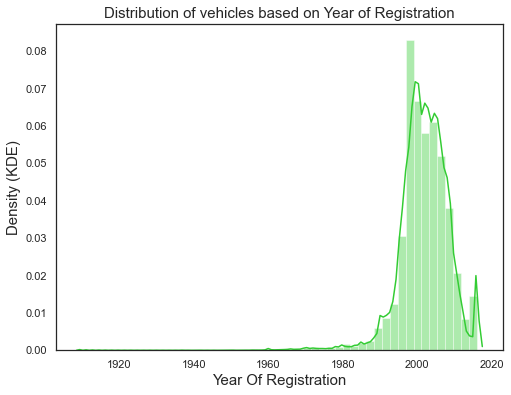

In [5]:
# Distribution of vehicles based on year of registration
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["Year of Registration"], color="#33cc33",kde=True, ax=ax)
ax.set_title('Distribution of vehicles based on Year of Registration', fontsize= 15)
plt.ylabel("Density (KDE)", fontsize= 15)
plt.xlabel("Year Of Registration", fontsize= 15)
plt.show()

In [9]:
# saving the plot
fig.savefig("/Users/dallingleed/Downloads/Capstone Project/Analysis1Plots/vehicle-distribution.png")

## Variation of the price range by the vehicle type

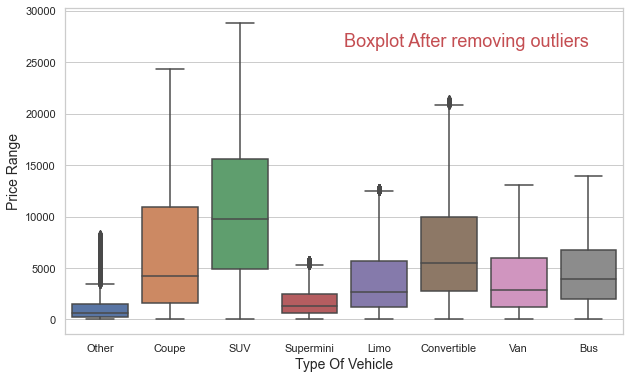

In [8]:
# Boxplot to see the distribution after outliers has been removed
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x="Vehicle Type", y="Price", data=df)
ax.text(5.25,27000,"Boxplot After removing outliers",fontsize=18,color="r",ha="center", va="center")
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':14})
ax.yaxis.set_label_text("Price Range",fontdict= {'size':14})
plt.show()

In [10]:
# saving the plot
fig.savefig("/Users/dallingleed/Downloads/Capstone Project/Analysis1Plots/price-vehicleType-boxplot.png")

## Total count of vehicles by type available on ebay for sale

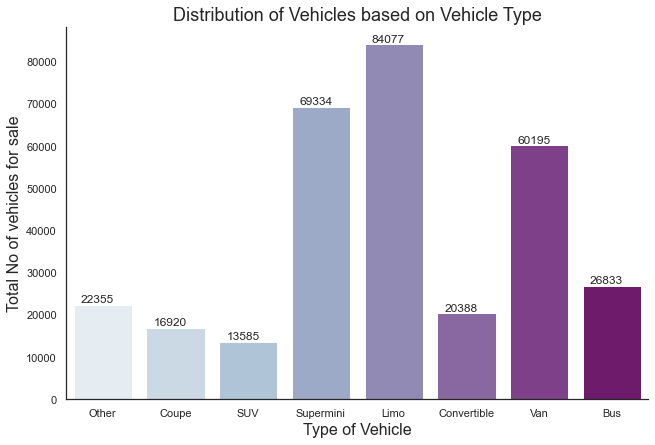

In [13]:
# Count plot to show the number of vehicles belonging to each vehicleType
sns.set_style("white")
g = sns.factorplot(x="Vehicle Type", data=df, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
g.ax.xaxis.set_label_text("Type of Vehicle",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total No of vehicles for sale", fontdict= {'size':16})
g.ax.set_title("Distribution of Vehicles based on Vehicle Type",fontdict= {'size':18})
# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

In [12]:
# saving the plot
fig.savefig("/Users/dallingleed/Downloads/Capstone Project/Analysis1Plots/count-vehicleType.png")